In [3]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import os
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Proyecto Imagenes'
os.chdir(path)
!pwd

/content/drive/MyDrive/Proyecto Imagenes


In [27]:
def FacialRecognition(image):
    # Load data
  #imagen = cv2.imread('gerhard3.jpg', cv2.IMREAD_GRAYSCALE)
  lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

  _, h, w = lfw_dataset.images.shape
  X = lfw_dataset.data
  y = lfw_dataset.target
  target_names = lfw_dataset.target_names

  # split into a training and testing set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


  # Compute a PCA 
  n_components = 100
  pca = PCA(n_components=n_components, whiten=True).fit(X_train)
  # apply PCA transformation
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  #im = (47, 62)
  #imgReS = cv2.resize(imagen, dim)
  #imgReShape =  imgReS.reshape(1,2914)
  #imagen_pca = pca.transform(imgReShape)#AQUI VA LA IMAGEN RESHAPE

  # train a neural network
  print("Fitting the classifier to the training set")
  clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

  dim = (47, 62)
  imgReS = cv2.resize(image, dim)
  imgReShape =  imgReS.reshape(1,2914)

  imagen_pca = pca.transform(imgReShape)
  ximagen = imagen_pca
  ximagen.reshape(1,-1)


  #print(ximagen.shape)
  newPrediction = clf.predict(ximagen)
  #print(newPrediction, target_names[newPrediction])
  PredictedName = target_names[newPrediction]
  listToStr = ' '.join([str(element) for element in PredictedName]) 
  
  print(newPrediction)
  plt.figure(figsize=(12,4))
  plt.subplot(121), plt.imshow(image,cmap='gray'), plt.title('Real name: [ingrese nombre]\n\n PredictedName: '+listToStr)
  plt.xticks([]), plt.yticks([])


  plt.show()

In [ ]:
# Load data
#imagen = cv2.imread('gerhard3.jpg', cv2.IMREAD_GRAYSCALE)
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#im = (47, 62)
#imgReS = cv2.resize(imagen, dim)
#imgReShape =  imgReS.reshape(1,2914)
#imagen_pca = pca.transform(imgReShape)#AQUI VA LA IMAGEN RESHAPE


In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.54851319
Validation score: 0.487500
Iteration 2, loss = 1.12141699
Validation score: 0.537500
Iteration 3, loss = 0.88491456
Validation score: 0.600000
Iteration 4, loss = 0.69523590
Validation score: 0.650000
Iteration 5, loss = 0.54163268
Validation score: 0.725000
Iteration 6, loss = 0.42606660
Validation score: 0.787500
Iteration 7, loss = 0.34255934
Validation score: 0.812500
Iteration 8, loss = 0.27814084
Validation score: 0.812500
Iteration 9, loss = 0.23037468
Validation score: 0.812500
Iteration 10, loss = 0.19197205
Validation score: 0.812500
Iteration 11, loss = 0.16051881
Validation score: 0.812500
Iteration 12, loss = 0.13508185
Validation score: 0.825000
Iteration 13, loss = 0.11500696
Validation score: 0.812500
Iteration 14, loss = 0.09834585
Validation score: 0.812500
Iteration 15, loss = 0.08518850
Validation score: 0.812500
Iteration 16, loss = 0.07439682
Validation score: 0.812500
Iteration 17, loss = 0

In [ ]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.77      0.88      0.82        66
  Donald Rumsfeld       0.88      0.56      0.69        41
    George W Bush       0.87      0.94      0.91       163
Gerhard Schroeder       0.87      0.71      0.78        38
       Tony Blair       0.74      0.76      0.75        34

         accuracy                           0.84       342
        macro avg       0.83      0.77      0.79       342
     weighted avg       0.84      0.84      0.83       342



Fitting the classifier to the training set
Iteration 1, loss = 1.50517578
Validation score: 0.487500
Iteration 2, loss = 1.13240896
Validation score: 0.525000
Iteration 3, loss = 0.90160996
Validation score: 0.612500
Iteration 4, loss = 0.70344414
Validation score: 0.787500
Iteration 5, loss = 0.55153785
Validation score: 0.812500
Iteration 6, loss = 0.44132312
Validation score: 0.812500
Iteration 7, loss = 0.35944474
Validation score: 0.825000
Iteration 8, loss = 0.29338461
Validation score: 0.825000
Iteration 9, loss = 0.23999882
Validation score: 0.862500
Iteration 10, loss = 0.19945135
Validation score: 0.875000
Iteration 11, loss = 0.16713943
Validation score: 0.875000
Iteration 12, loss = 0.14144803
Validation score: 0.875000
Iteration 13, loss = 0.11959736
Validation score: 0.850000
Iteration 14, loss = 0.10210133
Validation score: 0.837500
Iteration 15, loss = 0.08770612
Validation score: 0.825000
Iteration 16, loss = 0.07669851
Validation score: 0.825000
Iteration 17, loss = 0

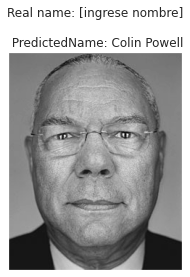

In [26]:
image = cv2.imread('colin.jpg', cv2.IMREAD_GRAYSCALE)

FacialRecognition(image)

In [8]:
#PARA HACER LAS COMPARACIONES CON UNA IMAGEN EN ESPECIFICO
imagen = cv2.imread('tony.jpg', cv2.IMREAD_GRAYSCALE)
dim = (47, 62)
imgReS = cv2.resize(imagen, dim)
imgReShape =  imgReS.reshape(1,2914)
FacialRecognition(imgReShape)
#imagen_pca = pca.transform(imgReShape)#AQUI VA LA IMAGEN RESHAPE

#la dimensionalidad de las imagenes es muy grande para metodos para el perceptron multicapa, y metodos de aprendizaje automatico clasica
#desventajas de PCA
ximagen = imagen_pca
ximagen.reshape(1,-1)


#print(ximagen.shape)
newPrediction = FacialRecognition.predict(ximagen)
#print(newPrediction, target_names[newPrediction])
PredictedName = target_names[newPrediction]
listToStr = ' '.join([str(element) for element in PredictedName]) 
 
print(newPrediction)
plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(imagen,cmap='gray'), plt.title('Real name: [ingrese nombre]\n\n PredictedName: '+listToStr)
plt.xticks([]), plt.yticks([])


plt.show()

NameError: ignored

In [ ]:
#PARA HACER LAS COMPARACIONES CON OTRO DATASET

xprueba = X_test_pca[0,:][np.newaxis]
ytrue = y_test[0]
xprueba.reshape(1,-1)
print(xprueba.shape)
newPrediction = clf.predict(xprueba)
print(newPrediction, ytrue, target_names[ytrue])


(1, 100)
[4] 0 Colin Powell


In [ ]:
print(clf.score(X_test_pca,y_test))

0.8538011695906432


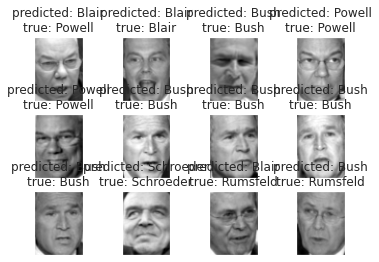

In [ ]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)
